# Creating a 1D periodic domain

In this notebook we create a 1D periodic domain by sampling regularly spaced points around the equator and then using [haversine](https://en.wikipedia.org/wiki/Haversine_formula) distance as the metric for place the mesh node points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import weather_model_graphs as wmg


# create N equally spaced points along the equator and return lat/lon
# by using haversine distance, we can create a mesh which wraps around the globe
# thus making a graph that represents a periodic domain
N = 40  # number of nodes in grid (the source data)
mesh_node_distance = (
    45.0  # distance between nodes in degrees, since we're using haversine distance
)
lats = np.zeros(N)
lons = np.linspace(0, 360, N, endpoint=False)
coords = np.stack([lons, lats], axis=1)

graph = wmg.create.archetype.create_keisler_graph(
    coords=coords, mesh_node_distance=mesh_node_distance, distance_metric="haversine"
)

2024-11-25 12:09:02.615 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:92 - No `projection` given: will apply distance metric directly to provided coordinates.


<Axes: >

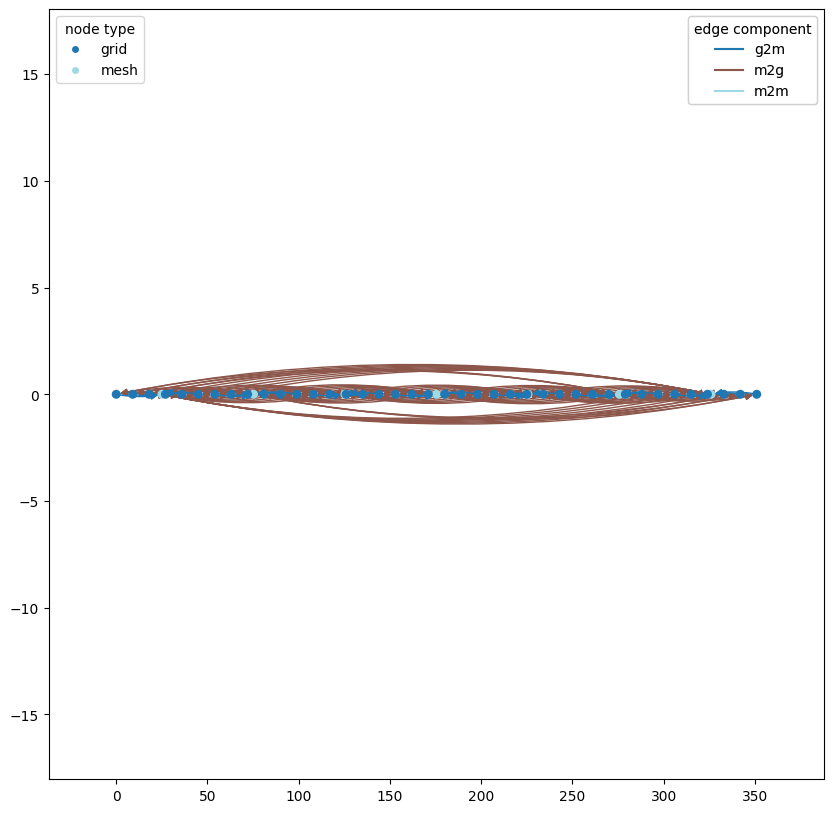

In [2]:
wmg.visualise.nx_draw_with_pos_and_attr(
    graph, node_size=30, edge_color_attr="component", node_color_attr="type"
)

<Axes: >

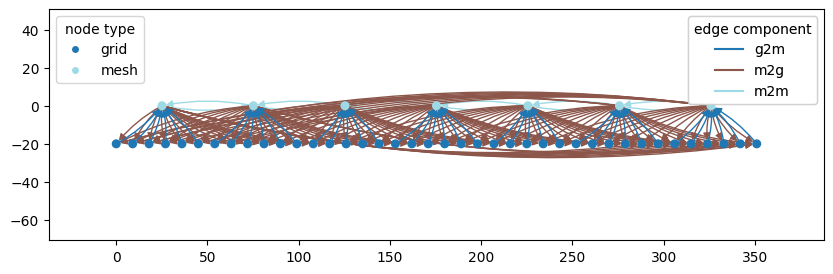

In [3]:
def posn_func(node):
    latlon_pos = node["pos"]
    plot_pos = latlon_pos.copy()
    if "level" in node:
        plot_pos[1] = node["level"] * 20
    return plot_pos


fig, ax = plt.subplots(figsize=(10, 3))
wmg.visualise.nx_draw_with_pos_and_attr(
    graph,
    ax=ax,
    node_size=30,
    edge_color_attr="component",
    node_color_attr="type",
    posn_func=posn_func,
)

In [ ]:
# hiearchical graph doesn't work yet

In [7]:
graph = wmg.create.archetype.create_oskarsson_hierarchical_graph(
    coords=coords,
    mesh_node_distance=1.0,
    distance_metric="haversine",
    level_refinement_factor=1.0,
)

2024-11-25 12:10:17.498 | DEBUG    | weather_model_graphs.create.base:create_all_graph_components:92 - No `projection` given: will apply distance metric directly to provided coordinates.
/Users/B280936/git-repos/mllam/weather-model-graphs/src/weather_model_graphs/create/mesh/mesh.py:118: RuntimeWarning: divide by zero encountered in log
  max_mesh_levels_float = np.log(extent_nodes_bottom_mesh) / np.log(
/Users/B280936/git-repos/mllam/weather-model-graphs/src/weather_model_graphs/create/mesh/mesh.py:118: RuntimeWarning: divide by zero encountered in divide
  max_mesh_levels_float = np.log(extent_nodes_bottom_mesh) / np.log(
/Users/B280936/git-repos/mllam/weather-model-graphs/src/weather_model_graphs/create/mesh/mesh.py:122: RuntimeWarning: invalid value encountered in cast
  max_mesh_levels = max_mesh_levels_float.astype(int)  # (2,)
2024-11-25 12:10:17.500 | DEBUG    | weather_model_graphs.create.mesh.mesh:create_multirange_2d_mesh_graphs:134 - mesh_levels: -9223372036854775808, nleaf

ValueError: At least two mesh levels are required for hierarchical mesh graph. You may need to reduce the refinement factorsor increase the max number of levels None or number of grid points 40.